### Remove gappy sequences

In [1]:
from Bio import SeqIO
from seqlike import aaSeqLike
import pandas as pd
import matplotlib.pyplot as plt
from seqlike.utils.sequences import ungap

from slugify import slugify

from therapeutic_enzyme_engineering_with_generative_neural_networks.gappy_sequences import identify_gappy_sequences


refrec = aaSeqLike(SeqIO.read('../data/B5LY47.fasta', 'fasta'))
print(refrec.id, len(refrec))
print(refrec)

Loading BokehJS ...

tr|B5LY47|B5LY47_ECOLX 278
AACIPLLLGSAPLYAQTSAVQQKLAALEKSSGGRLGVALIDTADNTQVLYRGDERFPMCSTSKVMAAAAVLKQSETQKQLLNQPVEIKPADLVNYNPIAEKHVNGTMTLAELSAAALQYSDNTAMNKLIAQLGGPGGVTAFARAIGDETFRLDRTEPTLNTAIPGDPRDTTTPRAMAQTLRQLTLGHALGETQRAQLVTWLKGNTTGAASIRAGLPTSWTVGDKTGSGGYGTTNDIAVIWPQGRAPLVLVTYFTQPQQNAESRRDVLASAARIIAEGL


In [2]:
refreckey = slugify(refrec.id, lowercase=False)
db = 'nr'
hits = 5000

#### Load BLASTp alignment

In [3]:

aligned = pd.Series(aaSeqLike(s) for s in SeqIO.parse(f'../data/{refreckey}_blast_{db}_{hits}_aligned.fasta', 'fasta'))

In [4]:
aligned.seq.as_alignment().get_alignment_length()

/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(


324

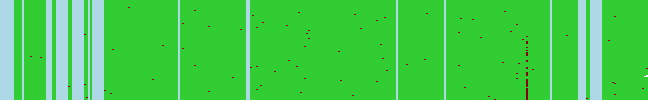

In [5]:
aligned.head(100).seq.plot(boxheight=1, use_bokeh=False, show_grouping=True)
#aligned.seq.plot(boxheight=10, show_ids=True)

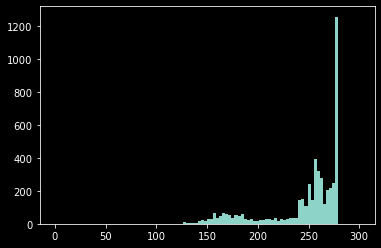

In [6]:


plt.hist([len(s.ungap()) for s in aligned], bins=100, range=(0,300));

#### Remove short sequences

In [7]:
seqrecs1 = pd.Series(s for s in aligned if len(s.ungap()) > 250)
print(len(seqrecs1))

3238


/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(
/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(
/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(


320


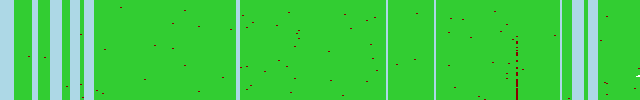

In [8]:
aligned1 = seqrecs1.seq.align()
print(aligned1.seq.as_alignment().get_alignment_length())
aligned1.head(100).seq.plot(boxheight=1, use_bokeh=False, show_grouping=True)

#### Remove gappy sequences

In [9]:

ignore = identify_gappy_sequences(seqrecs1, threshold=0.7, min_score=1)
seqrecs2 = pd.Series(s for s in seqrecs1 if s.id not in ignore)
print(len(ignore), len(seqrecs2))

400 2838


/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(
/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(
/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(


296


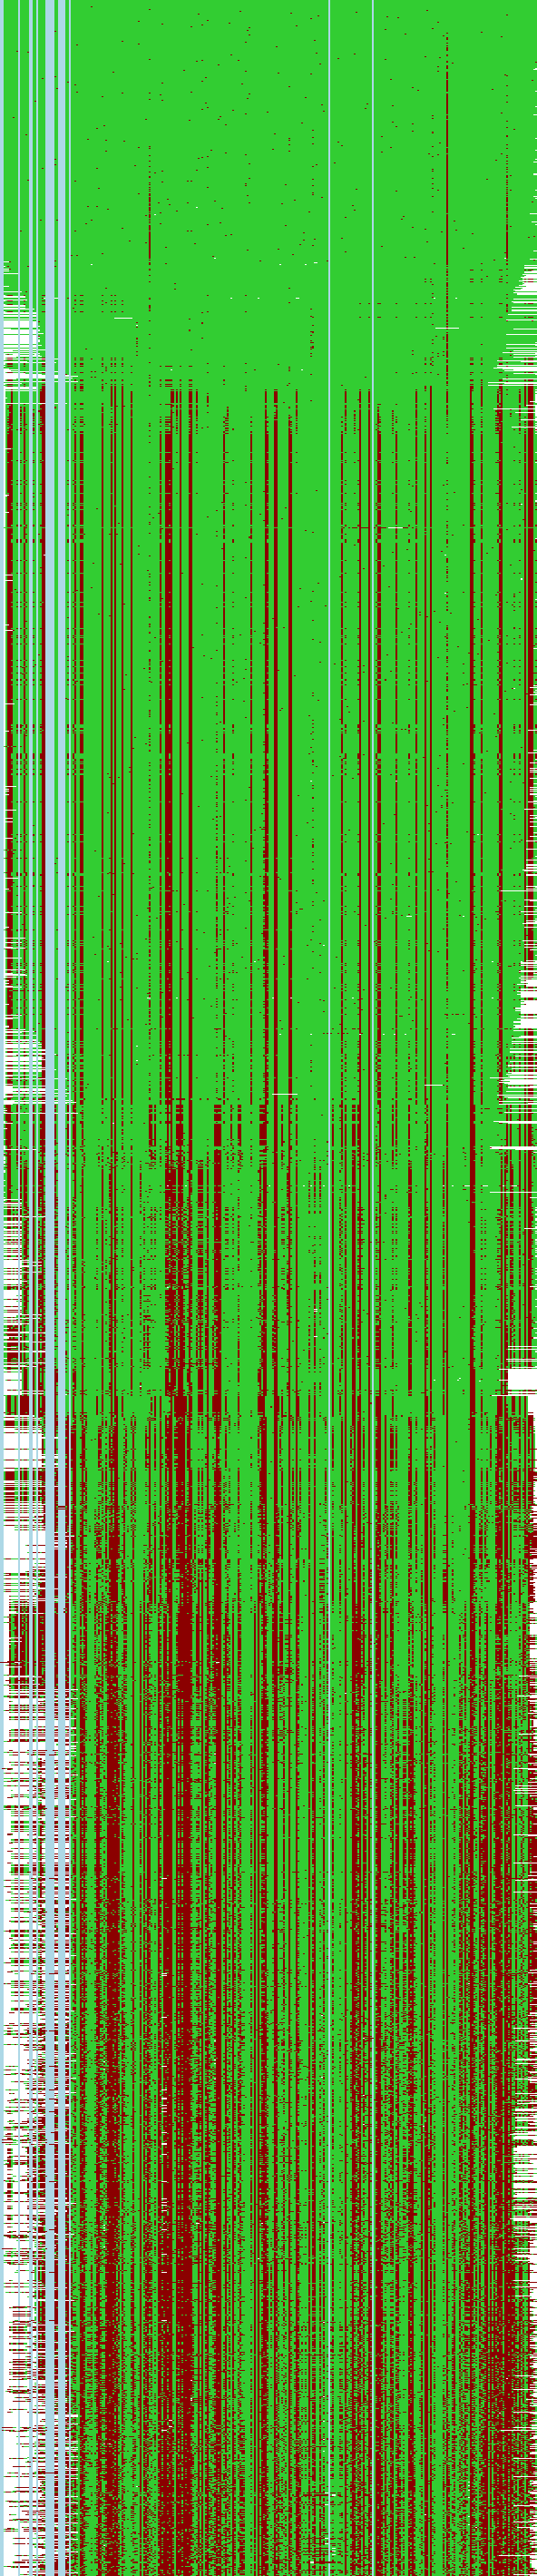

In [10]:
aligned2 = seqrecs2.seq.align()
print(aligned2.seq.as_alignment().get_alignment_length())
aligned2.seq.plot(boxheight=1, use_bokeh=False, show_grouping=True)

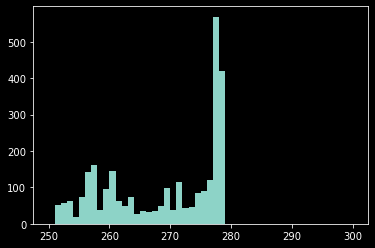

In [11]:
plt.hist([len(s.ungap()) for s in aligned2], bins=50, range=(250,300));